<a href="https://colab.research.google.com/github/Rupam-Shil/Fake-News-Detection/blob/master/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Natural Language Processing(FDN)



# Importing the libraries in first algorism (devian)

In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


## Importing the dataset

In [9]:
dataset = pd.read_csv('news.csv')

In [10]:
dataset.shape

(6335, 4)

## Cleaning the texts

In [12]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(6335):
  news = re.sub('[^a-zA-Z]',' ',dataset['text'][i])
  news = news.lower()
  news = news.split()
  ps = PorterStemmer()
  all_stopwords = set(stopwords.words('english'))
  all_stopwords.remove('not')
  news = [ps.stem(word) for word in news if word not in all_stopwords]
  news = ' '.join(news)
  corpus.append(news)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Creating the bag of words model

In [14]:
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values
print(len(X[0]))

43733


## Splitting the dataset into the Training set and Test set

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the model on Naive Bays Classification

In [18]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting the test set result

In [19]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [20]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[445 170]
 [ 89 563]]


## Checking the accuracy on K-fold Cross Validation

In [21]:
accuracy = cross_val_score(estimator = classifier,
                           X = X_train,
                           y = y_train,
                           cv = 10)
print('Accuracy: {:.2f} %'.format(accuracy.mean()*100))
print('Standard Deviation: {:.2f} %'.format(accuracy.std()*100))

Accuracy: 78.87 %
Standard Deviation: 2.35 %


# We have noticed it is low accuracy so se try another algorism

## Importing the libraries in first algorism (PassiveAggressiveClassifier)

In [22]:
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
cv = CountVectorizer()
X = dataset['text']
y = dataset['label']

## Train and test## Training the model on PassiveAggressiveClassifier

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

tv = TfidfVectorizer(stop_words='english', max_df=0.7)

X_train = tv.fit_transform(X_train)
X_test = tv.transform(X_test)

model = PassiveAggressiveClassifier(max_iter=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Checking the accuracy on K-fold Cross Validation


In [29]:

ac = accuracy_score(y_test, y_pred)
print(f'Accuracy : {round(ac*100, 2)}%')

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix :\n", cm)


cr = classification_report(y_test, y_pred)
print("\nClassification Report :\n", cr)


Accuracy : 93.5%

Confusion Matrix :
 [[727  44]
 [ 59 754]]

Classification Report :
               precision    recall  f1-score   support

        FAKE       0.92      0.94      0.93       771
        REAL       0.94      0.93      0.94       813

    accuracy                           0.93      1584
   macro avg       0.93      0.94      0.93      1584
weighted avg       0.94      0.93      0.93      1584



## visualize data

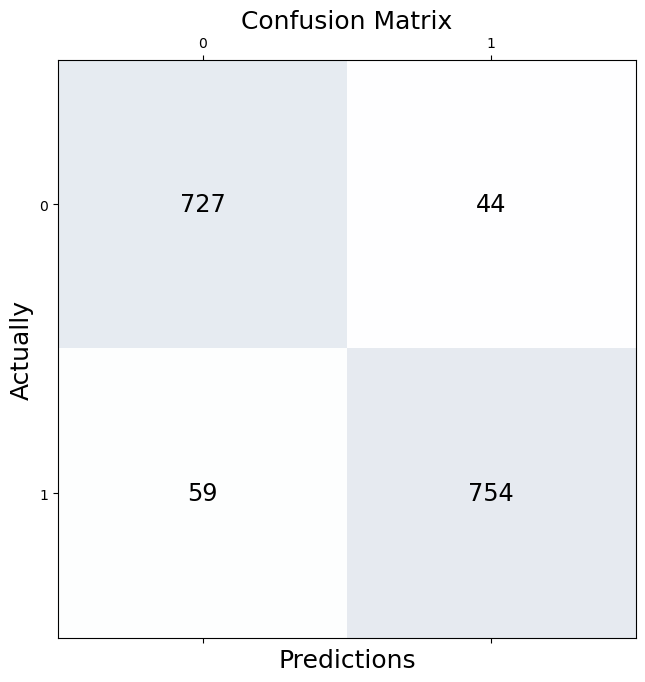

In [30]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.1)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actually', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


## Thanks